In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from glob import glob

In [ ]:
train_path = '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training'
validation_path='/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Validation'
test_path='/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Testing'

In [ ]:
train_path

'/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training'

In [ ]:
  # useful for getting number of output classes
folders = glob(train_path +'/*')

In [ ]:
folders

['/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training/OLP',
 '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training/OC',
 '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training/OT',
 '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training/Gum',
 '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training/CoS',
 '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training/CaS',
 '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training/MC']

In [ ]:
def load_and_preprocess_images(data_dir, image_size):
    """
    Function to load images from the directory, preprocess them, and generate labels.

    Parameters:
        data_dir (str): Path to the directory containing class folders.
        image_size (tuple): Desired size for resizing images.

    Returns:
        X (np.array): Preprocessed image data.
        y (np.array): Encoded labels.
    """
    X = []
    y = []

    # Get the list of class folders
    class_folders = glob(data_dir + '/*')

    # Loop through each folder (each class)
    for folder in class_folders:
        label = os.path.basename(folder)  # Get the class label based on folder name

        # Get all image files in the current folder
        image_files = glob(folder + '/*.jpg')

        for image_file in image_files:
            # Read the image
            img = cv2.imread(image_file)
            # Resize the image
            img = cv2.resize(img, image_size)
            # Convert the image from BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Append the image to X
            X.append(img)
            # Append the label to y
            y.append(label)

    # Convert lists to numpy arrays
    X = np.array(X, dtype='float32') / 255.0  # Normalize the image data
    y = np.array(y)

    # Encode the labels to integers
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Convert the labels to one-hot encoding
    y = to_categorical(y)

    return X, y, label_encoder




In [ ]:
# Usage
image_size = (224, 224)
# train_path = '/content/drive/My Drive/Cellula_internship/Teeth project/Teeth_Dataset/Training'
X_train, y_train, label_encoder = load_and_preprocess_images(train_path, image_size)


In [ ]:
X_validation, y_validation, label_encoder = load_and_preprocess_images(validation_path, image_size)
X_test, y_test, label_encoder = load_and_preprocess_images(test_path, image_size)


In [ ]:
# Check the shapes of the processed data
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)

X_validation shape: (1028, 224, 224, 3)
y_validation shape: (1028, 7)


In [ ]:
# Check the shapes of the processed data
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1028, 224, 224, 3)
y_test shape: (1028, 7)


In [ ]:

# Check the shapes of the processed data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (3087, 224, 224, 3)
y_train shape: (3087, 7)


In [ ]:
y_train[3000]

array([0., 0., 0., 1., 0., 0., 0.])

In [ ]:
def display_sample_images(X, y, label_encoder, num_samples=5):
    """
    Function to display a sample of images with their labels.

    Parameters:
        X (np.array): Array of images.
        y (np.array): Array of one-hot encoded labels.
        label_encoder (LabelEncoder): The label encoder used for encoding the labels.
        num_samples (int): Number of samples to display.
    """
    # Randomly select images to display
    indices = np.random.choice(len(X), num_samples, replace=False)
    sample_images = X[indices]
    sample_labels = y[indices]

    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i])
        label = label_encoder.inverse_transform([np.argmax(sample_labels[i])])[0]
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

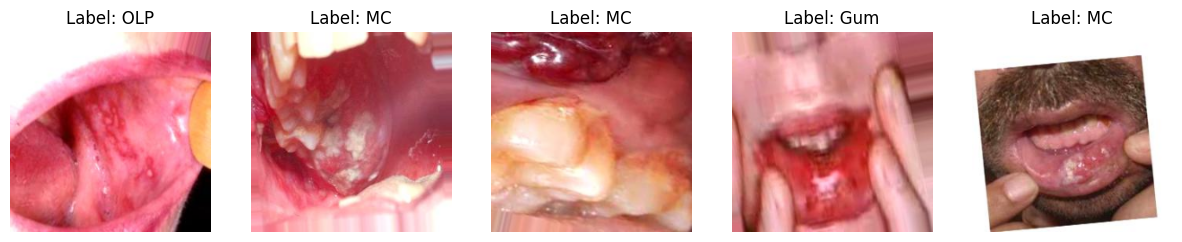

In [ ]:
# Display sample images
display_sample_images(X_train, y_train, label_encoder, num_samples=5)


In [ ]:
def check_class_distribution(y, label_encoder):
    """
    Function to check and visualize class distribution.

    Parameters:
        y (np.array): One-hot encoded labels.
        label_encoder (LabelEncoder): The label encoder used for encoding the labels.
    """
    # Convert one-hot encoded labels back to their original form
    y_labels = np.argmax(y, axis=1)

    # Get the class names
    class_names = label_encoder.inverse_transform(np.unique(y_labels))

    # Count occurrences of each class
    class_counts = np.bincount(y_labels)

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, class_counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

    # Print out the counts
    for class_name, count in zip(class_names, class_counts):
        print(f"Class: {class_name} | Number of Samples: {count}")

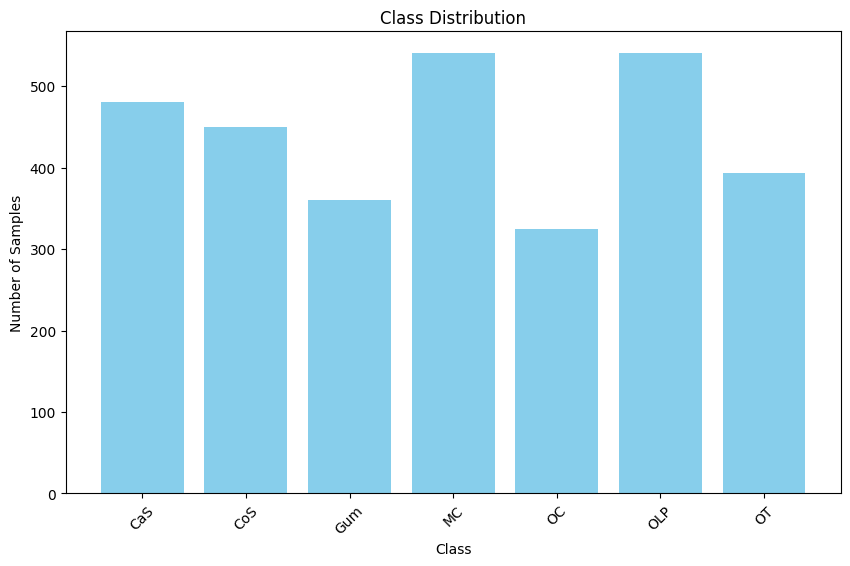

Class: CaS | Number of Samples: 480
Class: CoS | Number of Samples: 450
Class: Gum | Number of Samples: 360
Class: MC | Number of Samples: 540
Class: OC | Number of Samples: 324
Class: OLP | Number of Samples: 540
Class: OT | Number of Samples: 393


In [ ]:
# Check class distribution in your training data
check_class_distribution(y_train, label_encoder)

In [ ]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(X_train)

In [ ]:
# Display some augmented images
def display_augmented_images(X, y, label_encoder, datagen, num_samples=5):
    """
    Function to display augmented images with their labels.

    Parameters:
        X (np.array): Array of original images.
        y (np.array): Array of one-hot encoded labels.
        label_encoder (LabelEncoder): The label encoder used for encoding the labels.
        datagen (ImageDataGenerator): The data generator used for augmentation.
        num_samples (int): Number of samples to display.
    """
    plt.figure(figsize=(15, 5))

    for i in range(num_samples):
        # Randomly select an image
        index = np.random.randint(0, len(X))
        image = X[index]
        label = label_encoder.inverse_transform([np.argmax(y[index])])[0]

        # Generate augmented image
        augmented_image = datagen.random_transform(image)

        # Display the augmented image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(augmented_image)
        plt.title(f"Augmented Label: {label}")
        plt.axis('off')

    plt.show()



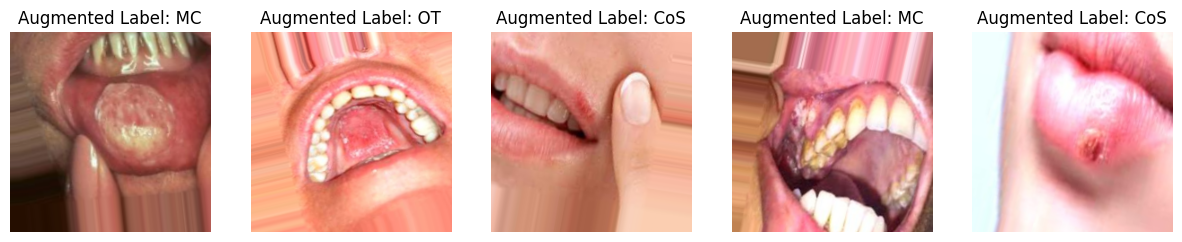

In [ ]:
# Display augmented samples
display_augmented_images(X_train, y_train, label_encoder, datagen, num_samples=5)

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model using the augmented data
batch_size = 32
epochs = 20

# Use the ImageDataGenerator to create augmented batches of images
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

# Fit the model
model.fit(train_generator, epochs=epochs, validation_data=(X_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 54s 432ms/step - accuracy: 0.1781 - loss: 2.3534 - val_accuracy: 0.2977 - val_loss: 1.8301
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 36s 349ms/step - accuracy: 0.2520 - loss: 1.8481 - val_accuracy: 0.3638 - val_loss: 1.6483
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - accuracy: 0.2964 - loss: 1.7682 - val_accuracy: 0.4202 - val_loss: 1.5389
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 347ms/step - accuracy: 0.3426 - loss: 1.6758 - val_accuracy: 0.4397 - val_loss: 1.4913
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 39s 366ms/step - accuracy: 0.3611 - loss: 1.6446 - val_accuracy: 0.4436 - val_loss: 1.4813
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 36s 349ms/step - accuracy: 0.3790 - loss: 1.6283 - val_accuracy: 0.4348 - val_loss: 1.4956
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 37s 346ms/step - accuracy: 0.3766 - loss: 1.6118 - val_accuracy: 0.4319 - val_loss: 1.4696
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 366ms/step - accuracy: 0.3932 - loss: 1.5701 - val_accuracy: 0.464

In [ ]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7117 - loss: 0.9902
Accuracy of the model is -  64.00778293609619 %
